<a href="https://colab.research.google.com/github/abhishek01bv/Heart_diease_prediction/blob/main/Project_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('values.csv')
df_label=pd.read_csv('labels.csv')

In [ ]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
df_label.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [ ]:
df_label.drop('patient_id',axis=1,inplace=True)

In [ ]:
df=pd.concat([df,df_label],axis=1)

In [ ]:
df.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [ ]:
df=df.rename(columns={'slope_of_peak_exercise_st_segment':'slope_peak','resting_blood_pressure':'resting_bp','fasting_blood_sugar_gt_120_mg_per_dl':'fasting(120mg/dl)','resting_ekg_results':'resting_ekg','serum_cholesterol_mg_per_dl':'cholestrol','oldpeak_eq_st_depression':'oldpeak_dep','max_heart_rate_achieved':'max_heart_rate','exercise_induced_angina':'exercise_angina','heart_disease_present':'disease'})

In [ ]:
df.head(2)

,patient_id,slope_peak,thal,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [ ]:
df.shape

(180, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         180 non-null    object 
 1   slope_peak         180 non-null    int64  
 2   thal               180 non-null    object 
 3   resting_bp         180 non-null    int64  
 4   chest_pain_type    180 non-null    int64  
 5   num_major_vessels  180 non-null    int64  
 6   fasting(120mg/dl)  180 non-null    int64  
 7   resting_ekg        180 non-null    int64  
 8   cholestrol         180 non-null    int64  
 9   oldpeak_dep        180 non-null    float64
 10  sex                180 non-null    int64  
 11  age                180 non-null    int64  
 12  max_heart_rate     180 non-null    int64  
 13  exercise_angina    180 non-null    int64  
 14  disease            180 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 21.2+ KB


In [ ]:
df.describe()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
patient_id,0
slope_peak,0
thal,0
resting_bp,0
chest_pain_type,0
num_major_vessels,0
fasting(120mg/dl),0
resting_ekg,0
cholestrol,0
oldpeak_dep,0


In [ ]:
df1=df.drop(['patient_id','thal'],axis=1)
df1.head(2)

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0


**Univarient** **Analysis**

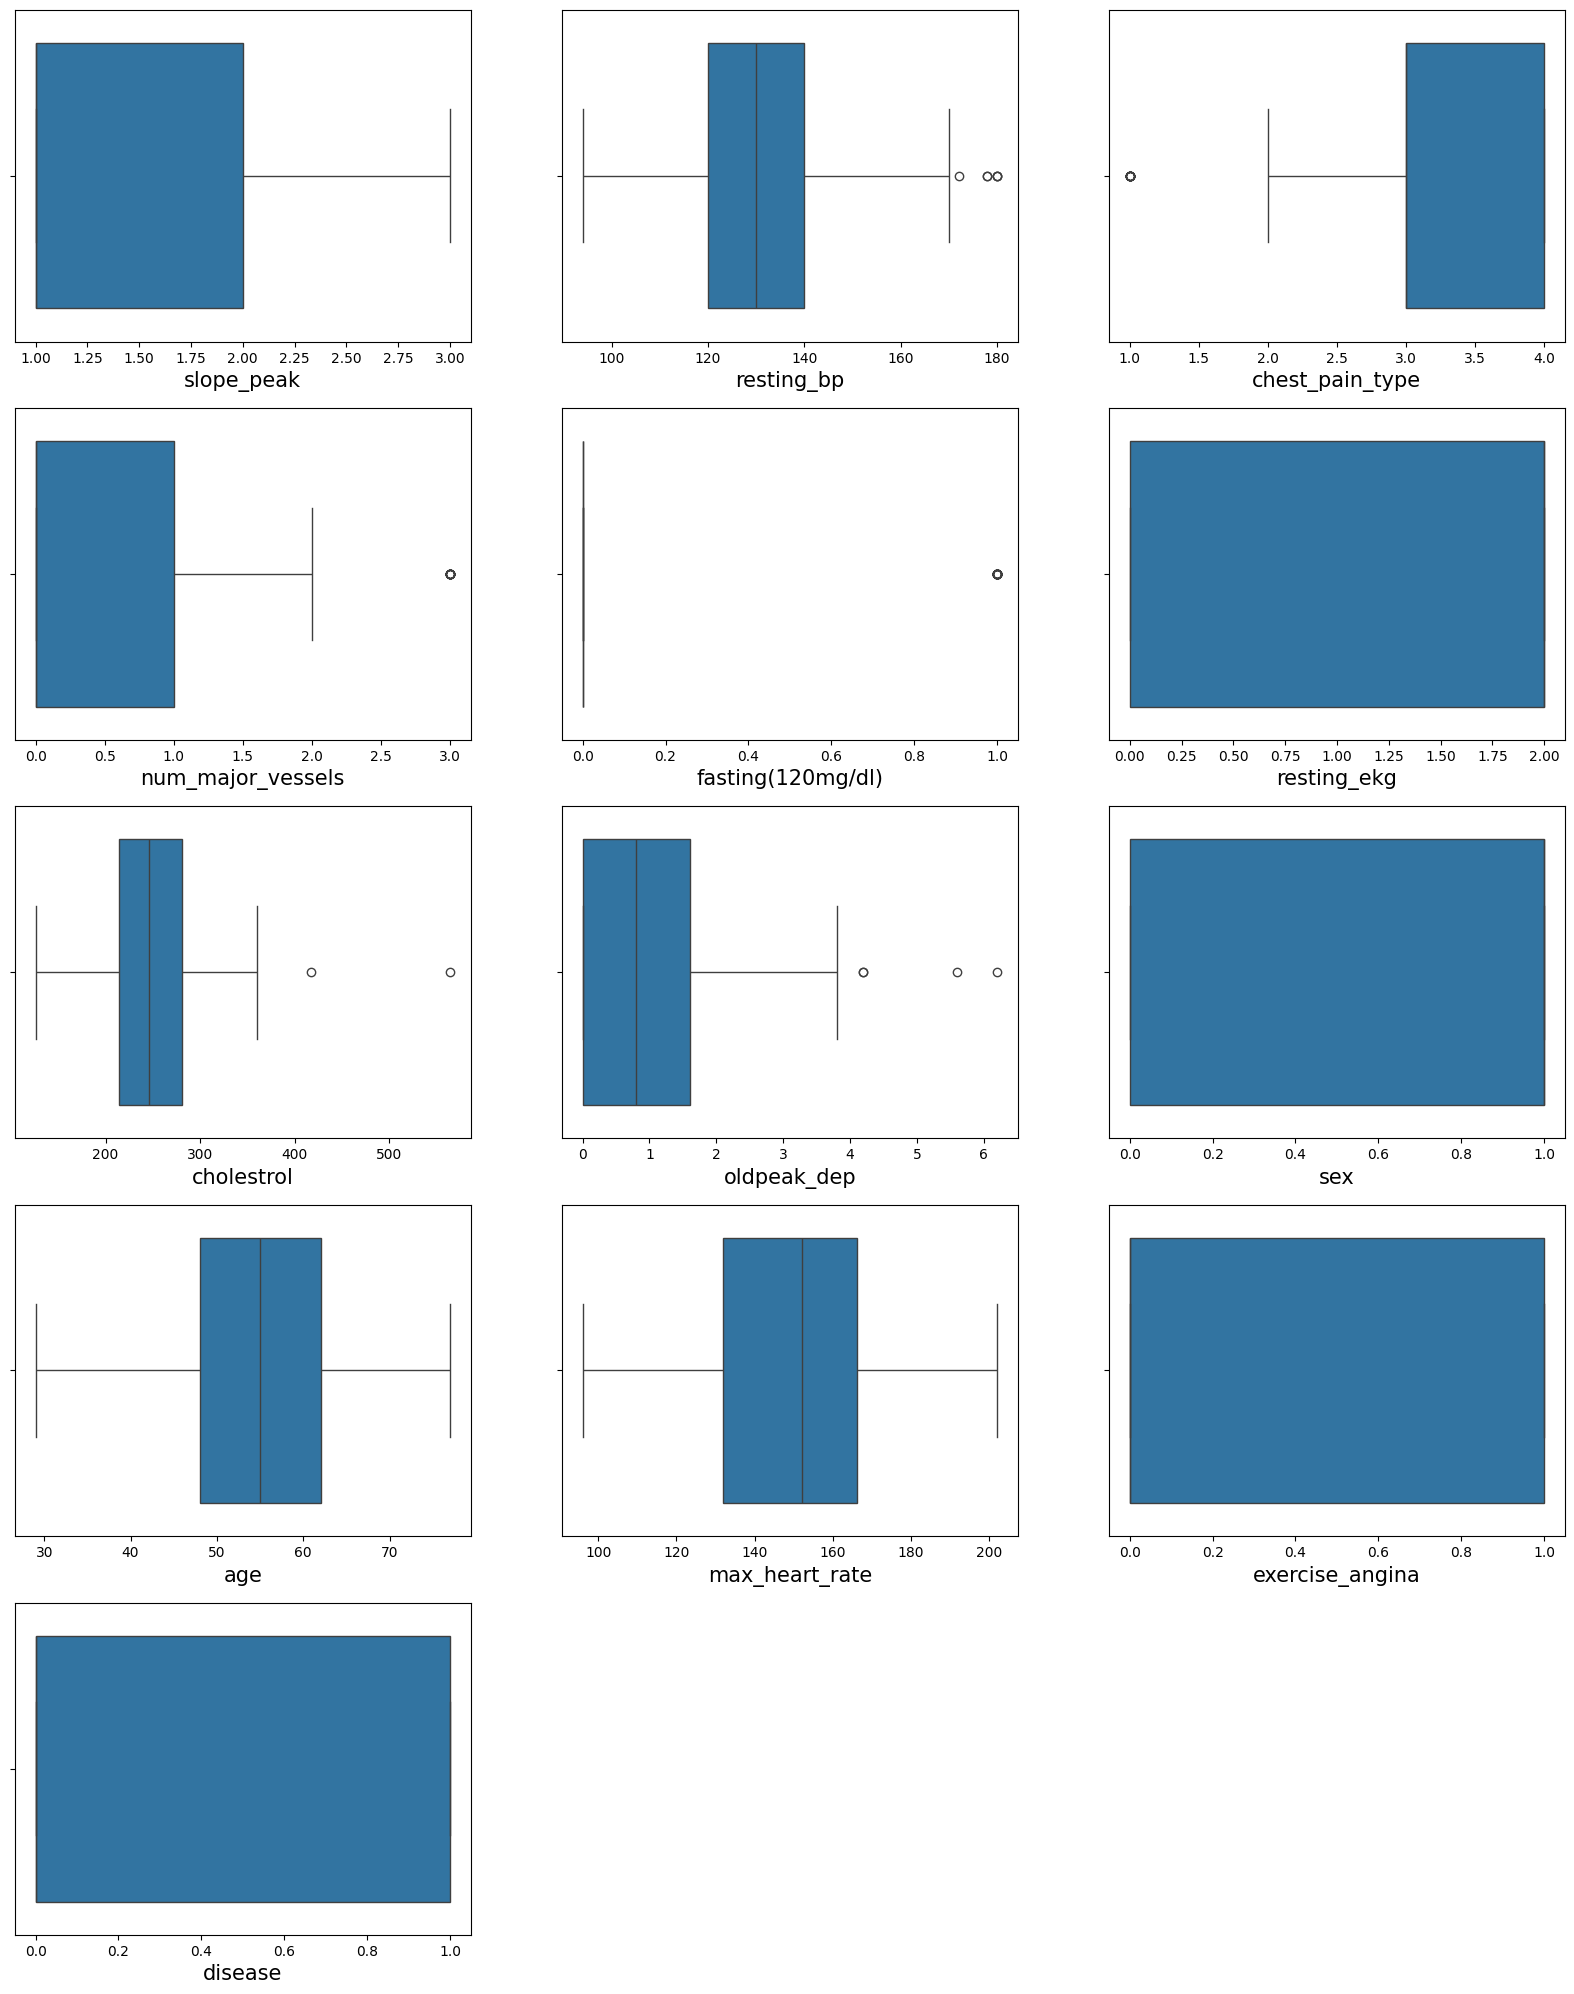

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.boxplot(x=df1[i])
    plt.xlabel(i,fontsize=15)
    plot+=1
plt.show()

Function to handle outliers

In [ ]:
def outliers(df,column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)

    mean_value = df[column].mean()

    df[column] = np.where((df[column] < LB) | (df[column] > UB), mean_value, df[column])

    return df

In [ ]:
df1=outliers(df1,'cholestrol')
df1=outliers(df1,'resting_bp')
df1=outliers(df1,'num_major_vessels')
df1=outliers(df1,'oldpeak_dep')

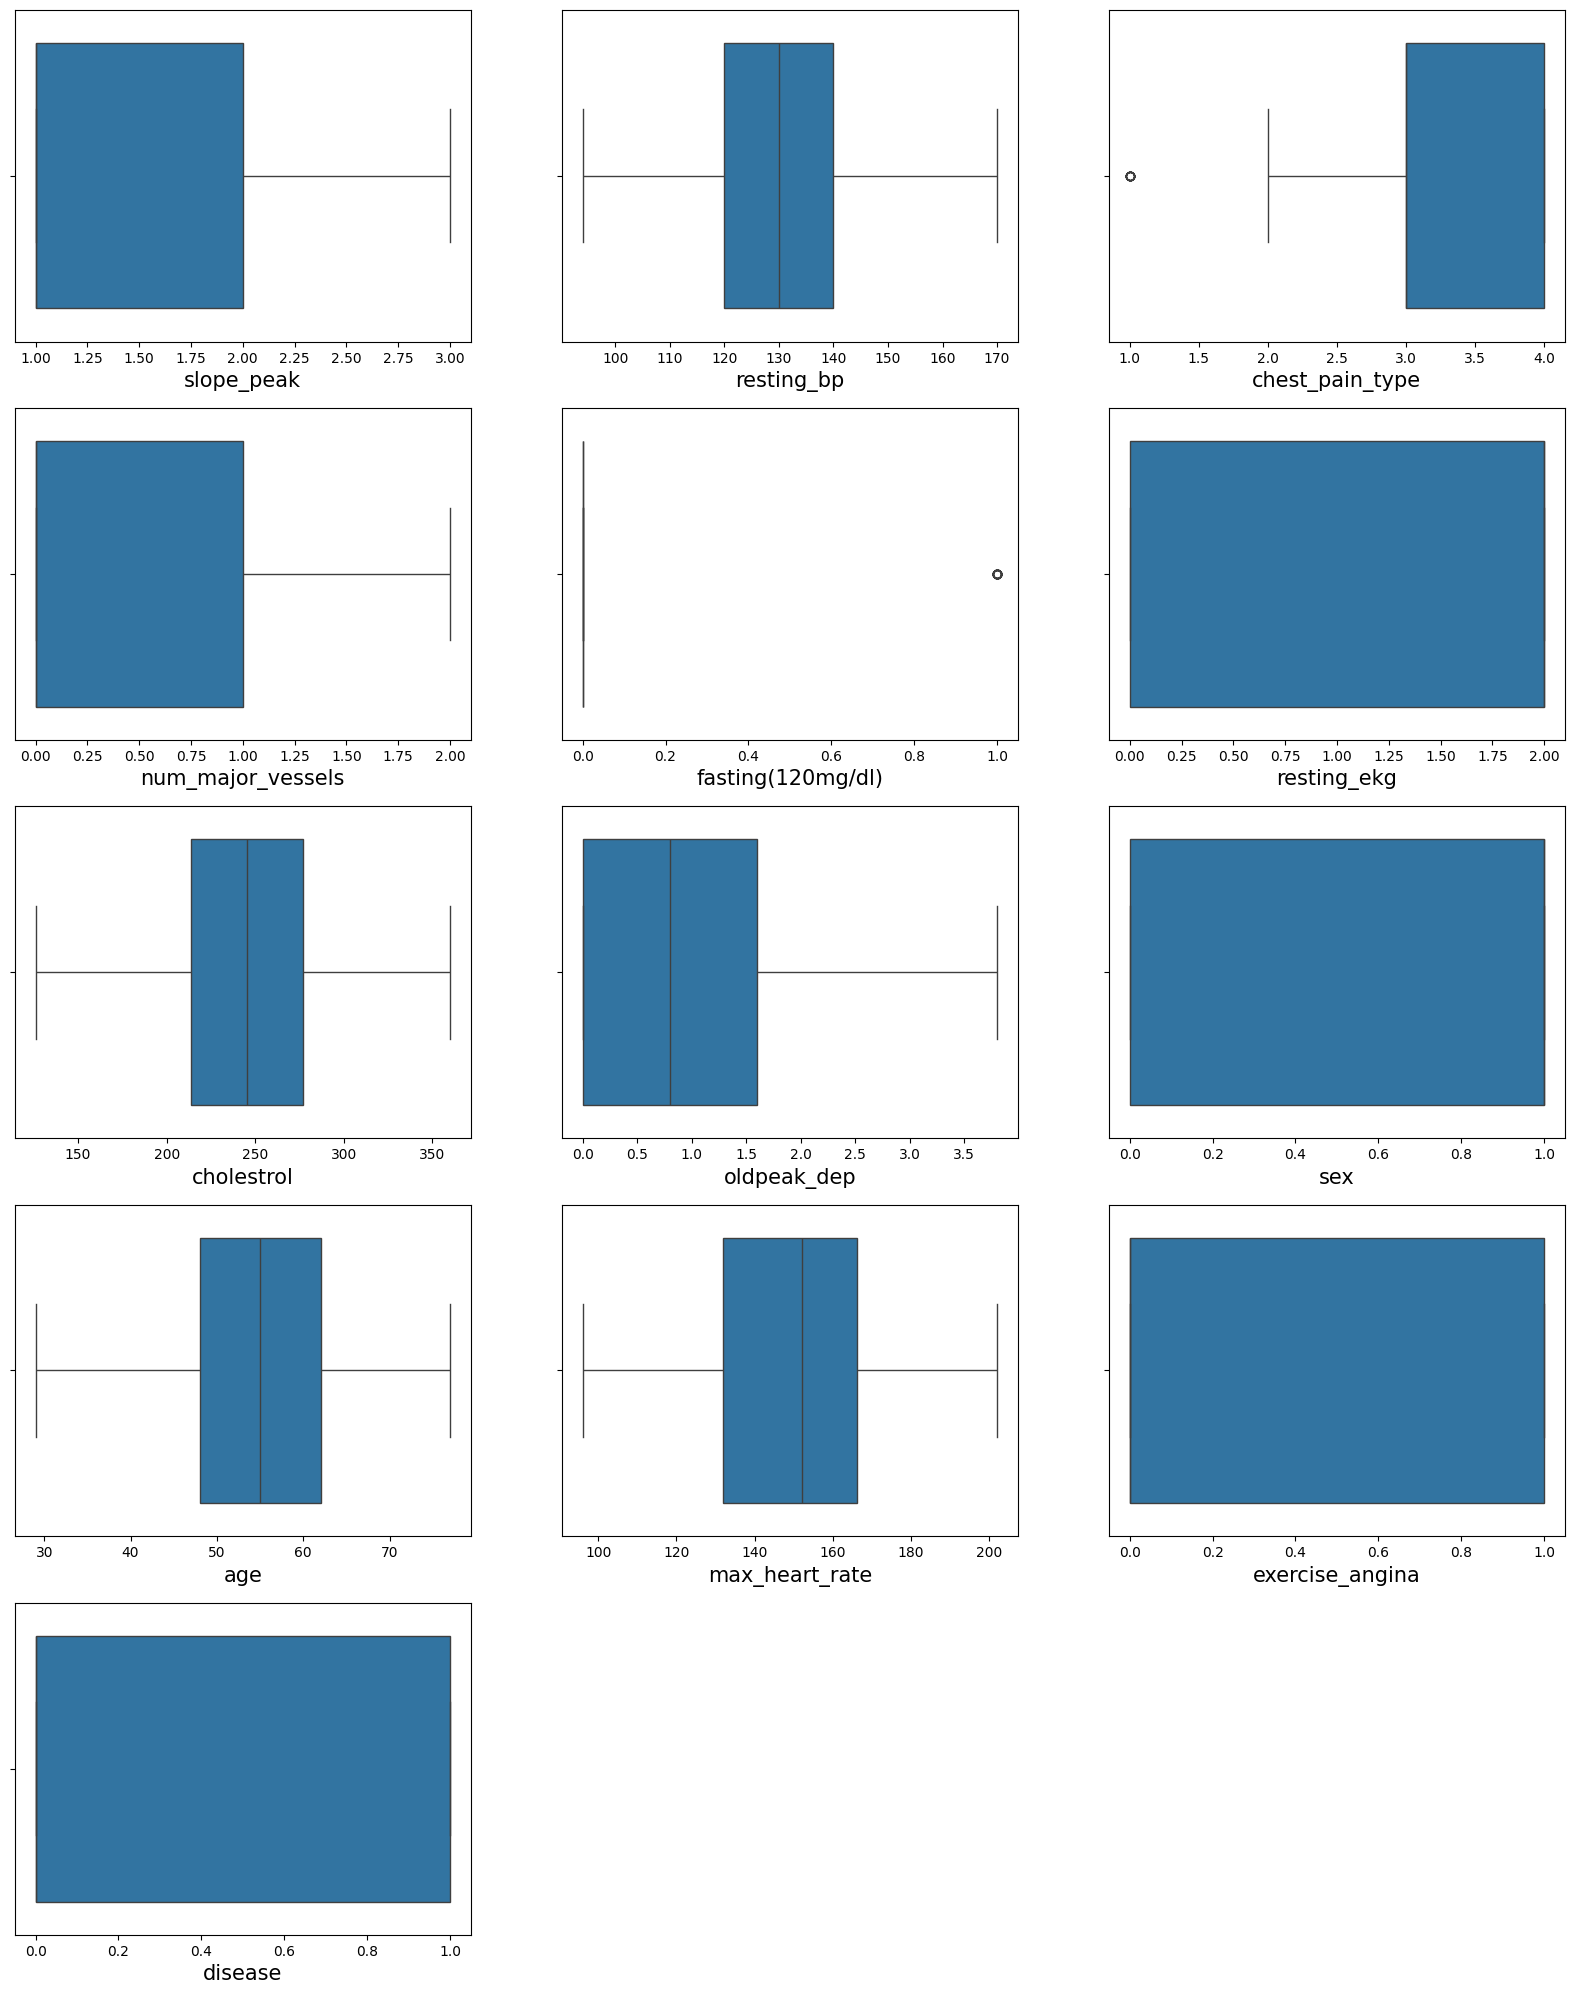

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.boxplot(x=df1[i])
    plt.xlabel(i,fontsize=15)
    plot+=1
plt.show()

Bi-varient Analysis

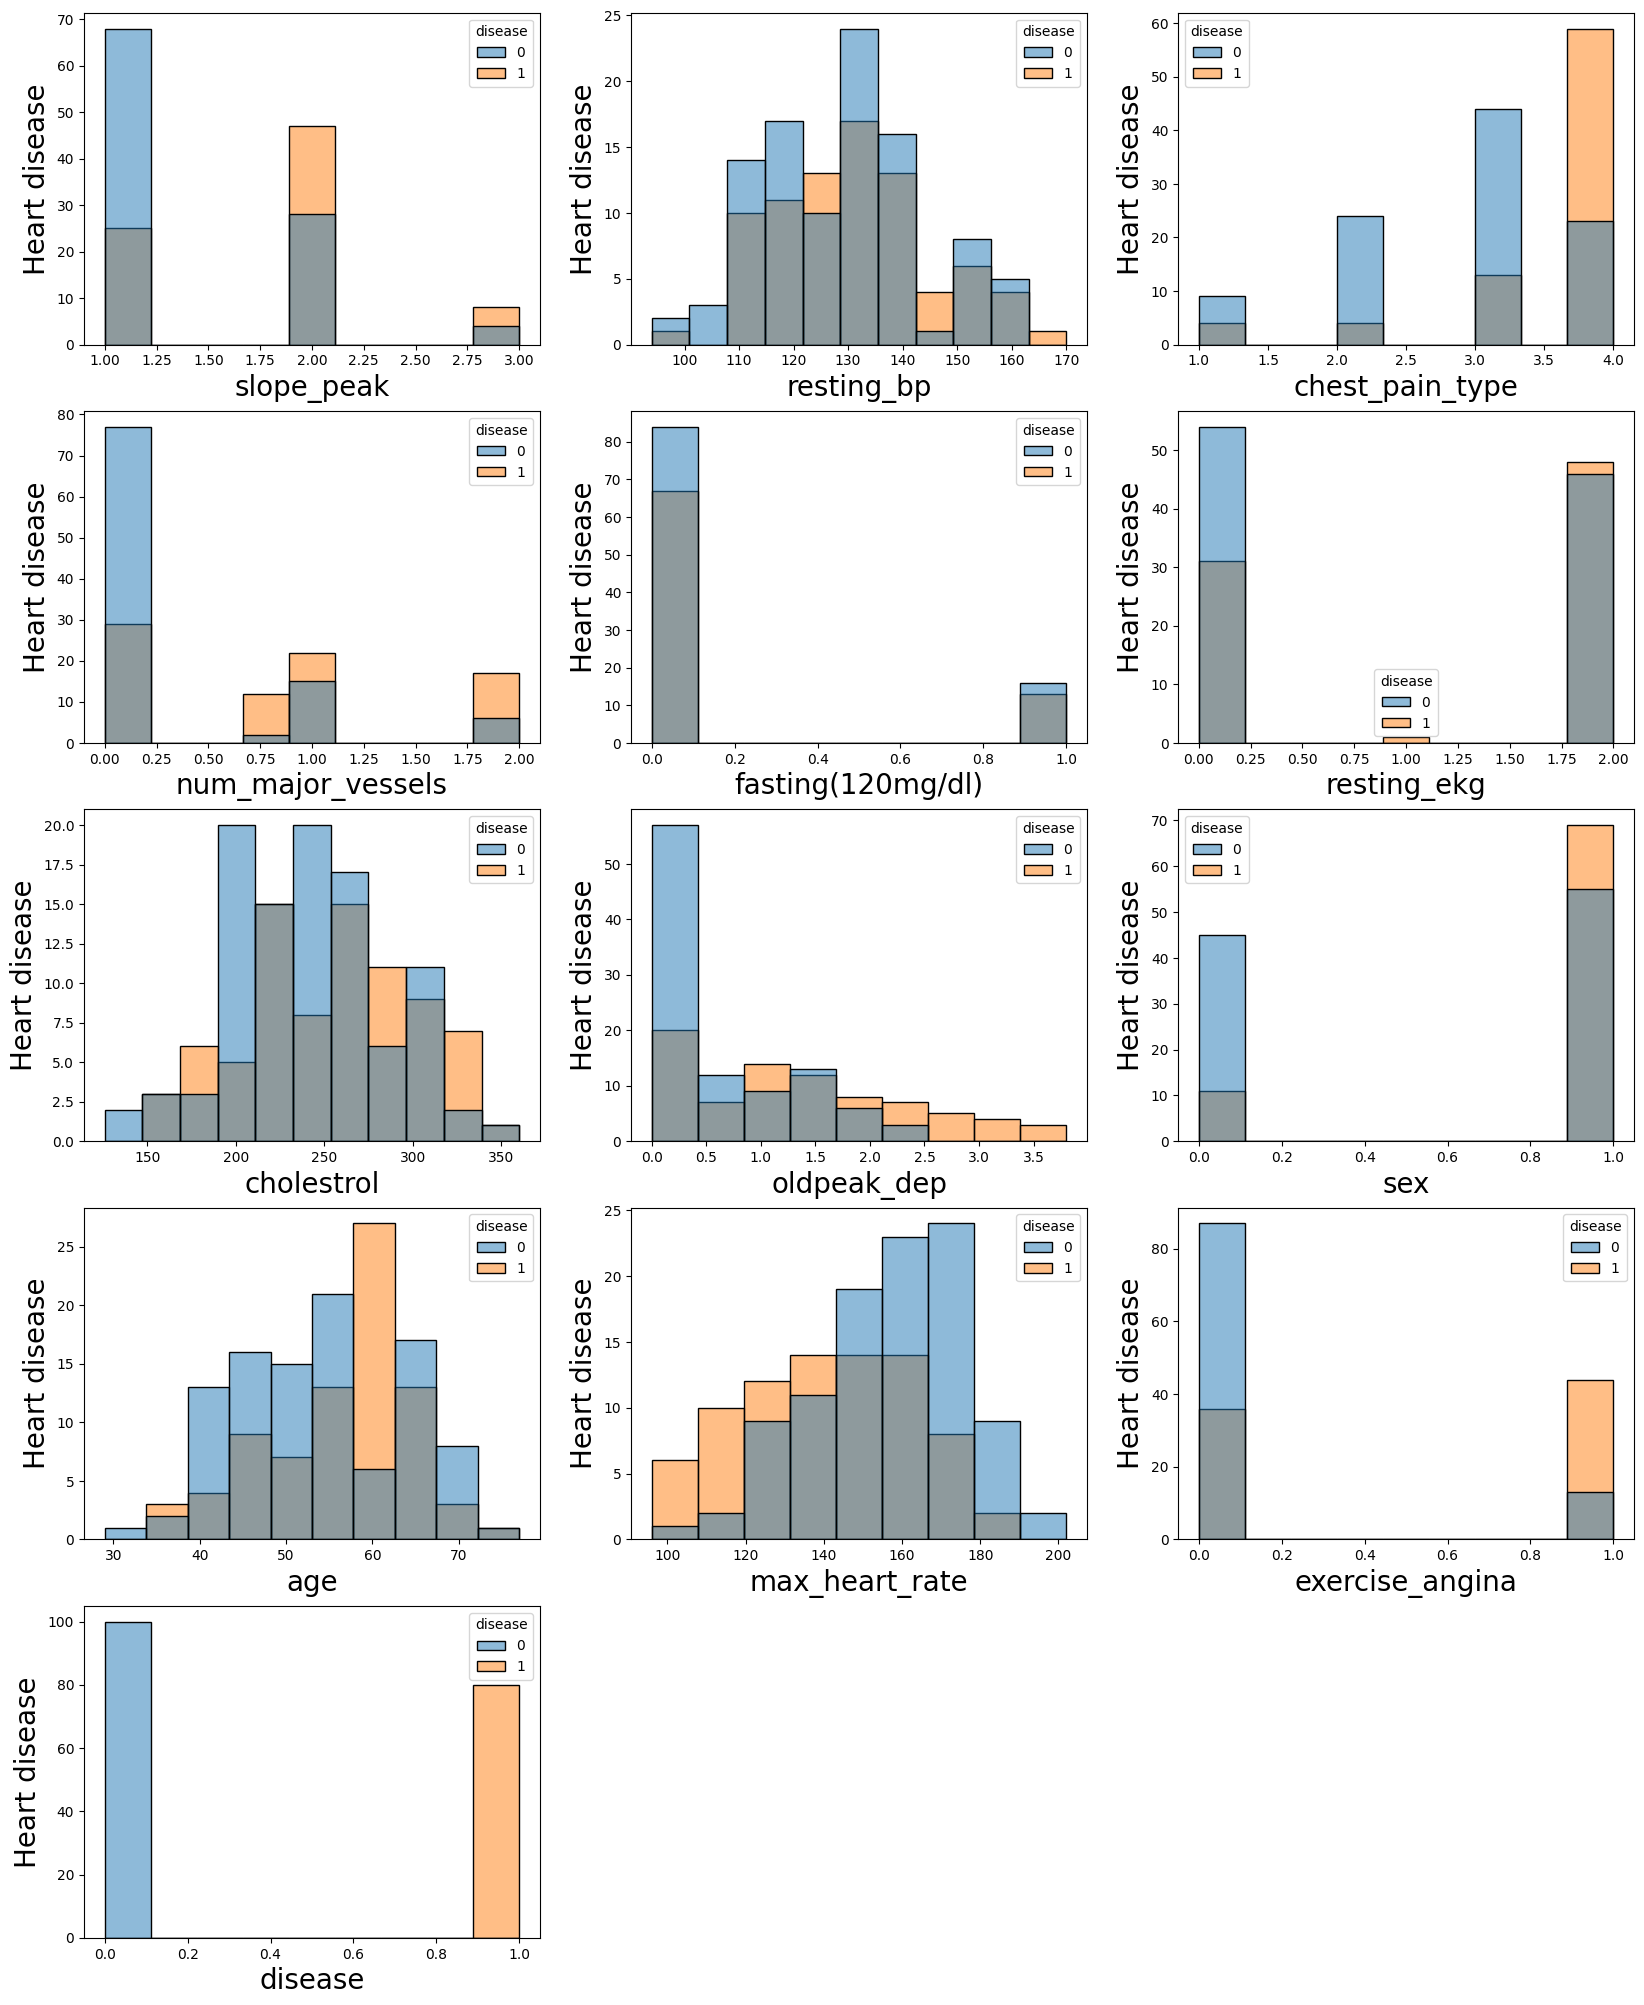

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.histplot(x=df1[i],hue=df1['disease'])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Heart disease',fontsize=20)
    plot+=1
plt.show()

**Analysis from the above plots**
* It is obserrved that fasting does'nt have any impact on the heart disease.
* It is observed that disease occur mostly in Type-4 chest pain.
* It is observed that disease occurs mostly in males.
* It is observed that people at age 60 tend to have more heart  disease.
*

<Axes: xlabel='oldpeak_dep', ylabel='slope_peak'>

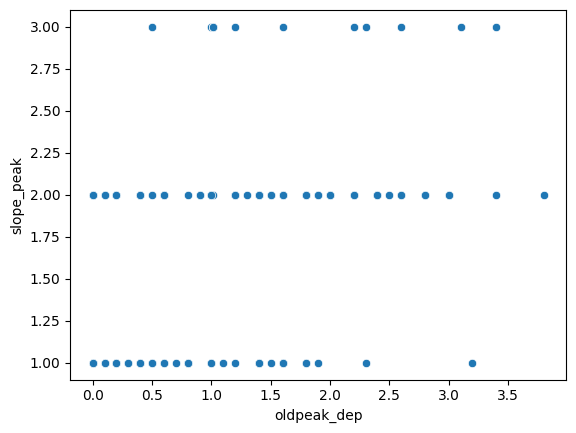

In [ ]:
sns.scatterplot(x='oldpeak_dep', y='slope_peak', data = df1)

In [ ]:
df1['slope_peak'].value_counts()

,count
slope_peak,
1,93
2,75
3,12


In [ ]:
correlation_matrix = df1['slope_peak'].corr(df1['oldpeak_dep'])
correlation_matrix

0.5453901277392832

In [ ]:
df1.head()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,1,128.000000,2,0.000000,0,2,308.0,0.00,1,45,170,0,0
1,2,110.000000,3,0.000000,0,0,214.0,1.60,0,54,158,0,0
2,1,125.000000,4,0.694444,0,2,304.0,0.00,1,77,162,1,1
3,1,152.000000,4,0.000000,0,0,223.0,0.00,1,40,181,0,1
4,3,131.311111,1,0.000000,0,2,270.0,1.01,1,59,145,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   slope_peak         180 non-null    int64  
 1   resting_bp         180 non-null    float64
 2   chest_pain_type    180 non-null    int64  
 3   num_major_vessels  180 non-null    float64
 4   fasting(120mg/dl)  180 non-null    int64  
 5   resting_ekg        180 non-null    int64  
 6   cholestrol         180 non-null    float64
 7   oldpeak_dep        180 non-null    float64
 8   sex                180 non-null    int64  
 9   age                180 non-null    int64  
 10  max_heart_rate     180 non-null    int64  
 11  exercise_angina    180 non-null    int64  
 12  disease            180 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 18.4 KB


In [ ]:
df1.drop(['fasting(120mg/dl)'], axis =1 ,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
patient_id = pd.DataFrame(le.fit_transform(df['patient_id']))
patient_id

,0
0,6
1,147
2,172
3,112
4,133
...,...
175,40
176,22
177,131
178,5


In [ ]:
dummies = pd.get_dummies(df[['thal']], drop_first=True, dtype= int)

In [ ]:
dummies

,thal_normal,thal_reversible_defect
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
175,0,1
176,1,0
177,0,1
178,1,0


In [ ]:
df['thal'].value_counts()

,count
thal,
normal,98
reversible_defect,74
fixed_defect,8


In [ ]:
df2 = pd.concat([df1, dummies], axis=1)

In [ ]:
df2.head()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease,thal_normal,thal_reversible_defect
0,1,128.000000,2,0.000000,2,308.0,0.00,1,45,170,0,0,1,0
1,2,110.000000,3,0.000000,0,214.0,1.60,0,54,158,0,0,1,0
2,1,125.000000,4,0.694444,2,304.0,0.00,1,77,162,1,1,1,0
3,1,152.000000,4,0.000000,0,223.0,0.00,1,40,181,0,1,0,1
4,3,131.311111,1,0.000000,2,270.0,1.01,1,59,145,0,0,0,1


In [ ]:
x= df2.drop('disease', axis=1)
y= df2['disease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(144, 13)
(144,)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print(X_sm.shape)
print(y_sm.shape)

(168, 13)
(168,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_sm, y_sm)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.9117647058823529

In [ ]:
confusion_matrix(y_test, y_pred)

array([[14,  2],
       [ 2, 16]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.89      0.89      0.89        18

    accuracy                           0.88        34
   macro avg       0.88      0.88      0.88        34
weighted avg       0.88      0.88      0.88        34



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_pred1=dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred1)

1.0

In [ ]:
confusion_matrix(y_test, y_pred1)

array([[16,  0],
       [ 0, 18]])

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

